# 02. Neural Network Classification with TensorFlow

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

**Classification Types:**
- Binary
- Multiclass
- Multilabel

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Make 1000 examples

n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)


In [2]:
# Features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualize

In [4]:
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


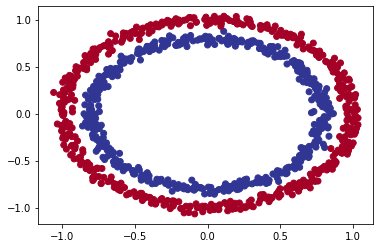

In [5]:
# Visualize with a plot
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# Input & Output Shapes

In [6]:
# Check shapes
X.shape, y.shape

((1000, 2), (1000,))

# Modelling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model

In [ ]:
# Create a model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(100, input_shape=(None, 1)),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1),
    ]
  )

# Compile

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model

model_1.fit(X, y, epochs=100)

In [8]:
model_1.evaluate(X, y), model_1.summary()

32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 100)         200       
                                                                 
 dense_1 (Dense)             (None, None, 10)          1010      
                                                                 
 dense_2 (Dense)             (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


([0.6939496994018555, 0.5], None)

# Create a function to visualize the model's precitions

* Take in a trained model, features (X), and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [9]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100), 
        np.linspace(y_min, y_max, 100)
      )
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0])>1:
    print('Doing multiclass classification')
    # Reshape our predictions
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('Doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


Doing multiclass classification


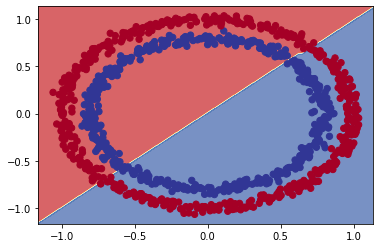

In [10]:
plot_decision_boundary(model=model_1, X=X, y=y)

In [ ]:
# The data is non-linear however the model is using a linear boundary.

# Can the model be used for a regression problem?
# Need to remake the model for regression isntead of binary classification
# Setup random seed
tf.random.set_seed(42)
# Create random regression data
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5) # y = X + 100

# Split the data into training and test sets
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]
# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)


# Fit model

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)


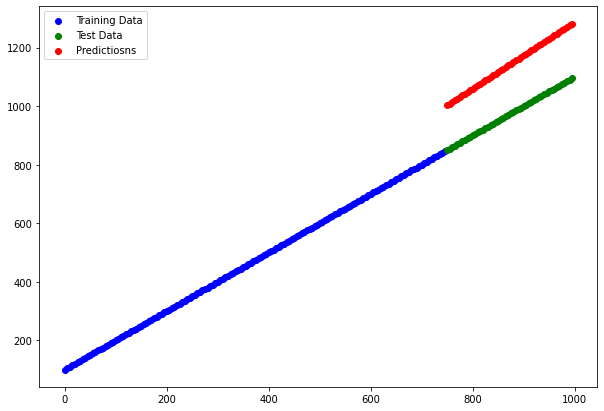

In [18]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions again
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data" )
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictiosns")
plt.legend()

# Non-linearity


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(1, activation="linear")
    ]
)
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
                )
# Fit the model
history_4 = model_4.fit(X, y, epochs=100)

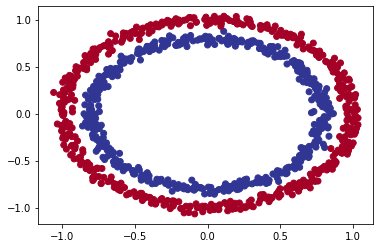

In [21]:
# visualize original data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

Doing binary classification


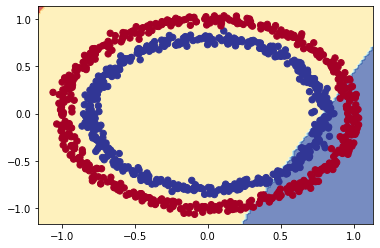

In [22]:
# Check decision boundary for the latest model
plot_decision_boundary(model_4, X=X, y=y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # output activation layer, 1 + sigmoid for binary
    ]
)
# Compile
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
                )
# Fit the model
# model_5
history_5 = model_5.fit(X, y, epochs=150)

Doing binary classification


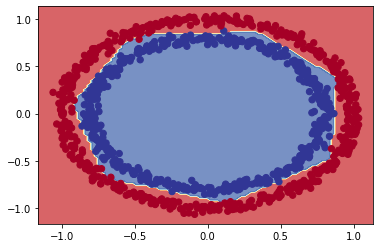

In [64]:
# Check decision boundary for the latest model
plot_decision_boundary(model_5, X=X, y=y)

In [65]:
y_reg_preds = model_5.evaluate(X, y)

# # Plot the model's predictions again
# plt.figure(figsize=(10, 7))
# plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
# plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data" )
# plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictiosns")
# plt.legend()

32/32 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.9930


What's wrong with the predictions?
What data did the model learn on and what did we predict on?

🔑 The combination of **linear and non-linear functions** is one of the key fundamentals of neural networks.

In [66]:
# Create a toy tensor (similar to the data we passed to the previous models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

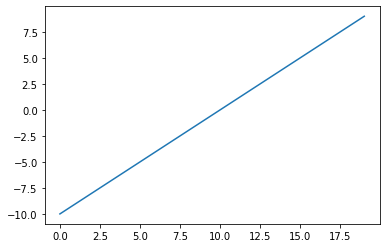

In [67]:
# Visualize
plt.plot(A)

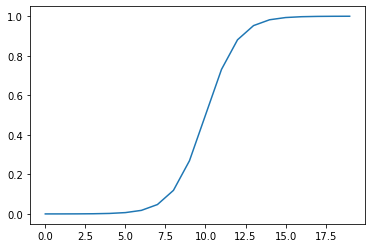

In [71]:
# Start by replicating sigmoid: `sigmoid(x) = 1 / (1 + exp(-x))`
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
  
customSigA = sigmoid(A)
plt.plot(customSigA)

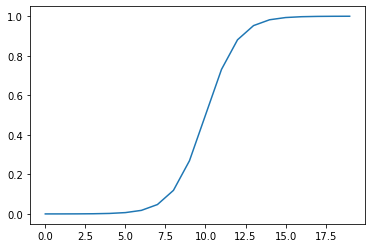

In [72]:
# TensorFlow sigmoid, same as above
sigA = tf.keras.activations.sigmoid(A)
plt.plot(sigA)

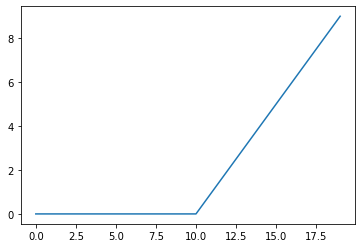

In [78]:
# Relu: max(x, 0)
# relu recreated
def relu(x):
  return tf.maximum(x, 0)

plt.plot(relu(A))

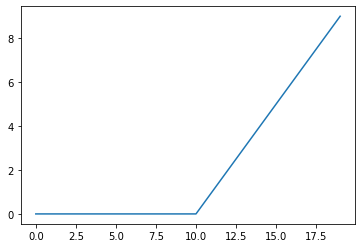

In [77]:
# TensorFlow Relu: same as above
plt.plot(tf.keras.activations.relu(A))

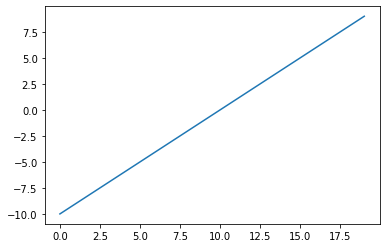

In [79]:
# linear activation function
def linear(x):
  return x

plt.plot(linear(A))